In [160]:
import pandas as pd

In [31]:
f = "./protein_hfd.csv"
df = pd.read_csv(f, index_col=0)
df.head()

,cluster,cluster_ix,prot_length,gene_id,percent_ident
0,Cluster 0,0,6925,Z5741_01270,100.00
1,Cluster 0,1,6925,Z5801_00509,99.97
2,Cluster 0,2,1570,Z5821_01888,96.69
3,Cluster 0,3,1570,Z6011_01319,96.69
4,Cluster 0,4,6925,Z6023_01090,100.00


In [32]:
genomes = df.gene_id.str.split("_", expand=True)
genomes.columns = ['genome', 'gene_name']
df =pd.concat([df, genomes], axis=1)

In [33]:
df.sample(5)

,cluster,cluster_ix,prot_length,gene_id,percent_ident,genome,gene_name
7618,Cluster 1988,1,600,Z5801_02443,100.00,Z5801,02443
69360,Cluster 19343,0,159,Z5971_00645,100.00,Z5971,00645
39238,Cluster 10274,9,304,Z6021_01176,97.37,Z6021,01176
504,Cluster 144,0,1254,Z5801_04281,100.00,Z5801,04281
49185,Cluster 13087,0,254,Z5741_03845,100.00,Z5741,03845


In [39]:

num_members = df.groupby(['cluster']).genome.nunique().reset_index()

<AxesSubplot:>

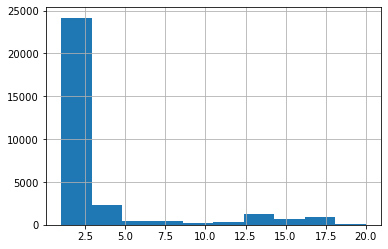

In [43]:
num_members.genome.hist()

In [76]:
coi = num_members[num_members.genome >=19].cluster

In [77]:
coi

3          Cluster 100
236      Cluster 10209
438      Cluster 10391
440      Cluster 10393
442      Cluster 10395
             ...      
29811     Cluster 8995
29999     Cluster 9163
30242     Cluster 9382
30606      Cluster 971
30683      Cluster 978
Name: cluster, Length: 125, dtype: object

In [78]:
df_coi = df[df.cluster.isin(coi)]
df_coi

,cluster,cluster_ix,prot_length,gene_id,percent_ident,genome,gene_name
326,Cluster 100,0,1342,Z5741_04361,100.00,Z5741,04361
327,Cluster 100,1,1342,Z5761_04515,100.00,Z5761,04515
328,Cluster 100,2,1342,Z5781_04211,100.00,Z5781,04211
329,Cluster 100,3,1342,Z5801_04497,100.00,Z5801,04497
330,Cluster 100,4,1342,Z5821_04211,99.93,Z5821,04211
...,...,...,...,...,...,...,...
95414,Cluster 29653,15,53,Z6023_00988,100.00,Z6023,00988
95415,Cluster 29653,16,53,Z6024_03518,100.00,Z6024,03518
95416,Cluster 29653,17,53,Z6025_00739,100.00,Z6025,00739
95417,Cluster 29653,18,53,Z6026_02546,90.57,Z6026,02546


In [94]:
df_coi.groupby('cluster').agg({'percent_ident':['std', 'mean']}).sort_values(('percent_ident', 'std')).tail(10)

percent_ident           
                        std       mean
cluster                               
Cluster 389        2.951127  98.134211
Cluster 22835      2.968817  98.522105
Cluster 1932       2.980303  98.004000
Cluster 9163       3.004870  97.522857
Cluster 13291      3.010968  98.375789
Cluster 16393      3.313766  98.245789
Cluster 5930       3.670304  96.267778
Cluster 20471      3.708032  97.198421
Cluster 22845      3.817088  97.739474
Cluster 2557       4.561040  95.401379

In [95]:
df_coi[df_coi.cluster == 'Cluster 5930']

,cluster,cluster_ix,prot_length,gene_id,percent_ident,genome,gene_name
23218,Cluster 5930,0,404,Z5741_00150,100.00,Z5741,00150
23219,Cluster 5930,1,404,Z5761_00356,99.50,Z5761,00356
23220,Cluster 5930,2,404,Z5761_04232,91.34,Z5761,04232
23221,Cluster 5930,3,404,Z5781_04834,99.75,Z5781,04834
23222,Cluster 5930,4,404,Z5801_01688,100.00,Z5801,01688
23223,Cluster 5930,5,404,Z5821_01594,98.51,Z5821,01594
23224,Cluster 5930,6,404,Z5821_02825,91.83,Z5821,02825
23225,Cluster 5930,7,404,Z5841_00442,94.55,Z5841,00442
23226,Cluster 5930,8,404,Z5871_03227,100.00,Z5871,03227
23227,Cluster 5930,9,404,Z5894_00540,99.50,Z5894,00540


In [5]:
from Bio import SeqIO
def alilgnment_to_df(alignment_file):
    rids = []
    seqs = []
    records = SeqIO.parse(alignment_file, 'fasta')
    for record in records:
        rids.append(record.id)
        seqs.append(str(record.seq))
    alignments = [rids, seqs]

    df = pd.DataFrame(alignments, index =['gene_id', 'seq']).T
    positions = pd.DataFrame(df.seq.apply(list).to_list())
    return pd.concat([df['gene_id'], positions], axis=1).set_index('gene_id')

In [6]:
df = alilgnment_to_df("/Users/ansintsova/git_repos/strainPrimer/strainPrimer/tests/test_files/c5930.strain.alignment")

In [98]:
df = df.drop("Z5991_04494")

In [8]:
from scipy.stats import entropy

In [51]:
import numpy as np
def position_entropy(s):
    counts = s.value_counts()
    if '-' in counts.keys():
        return np.nan
    return entropy(counts)
    

In [54]:
entropy([0.25, 0.25, 0.25, 0.25])

1.3862943611198906

In [56]:
entropy([0, 0, 0,1])

0.0

In [99]:
ent_df = df.apply(position_entropy)

In [100]:
ent_df

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
1210    0.000000
1211    0.000000
1212    0.000000
1213    0.000000
1214    0.357627
Length: 1215, dtype: float64

In [120]:
pleft = df.iloc[:, 182:205]
pright = df.iloc[:, 1130:1170]

In [115]:
pleft[178].value_counts()

c    26
Name: 178, dtype: int64

In [121]:
pleft

,182,183,184,185,186,187,188,189,190,191,...,195,196,197,198,199,200,201,202,203,204
gene_id,,,,,,,,,,,,,,,,,,,,,
Z5741_00150,c,c,g,t,a,t,c,g,a,a,...,a,t,c,t,g,g,c,a,g,t
Z5761_00356,c,c,g,t,a,t,c,g,a,a,...,a,t,c,t,g,g,c,a,g,t
Z5761_04232,c,c,g,t,a,t,c,g,a,a,...,a,t,c,t,g,g,c,a,a,t
Z5781_04834,c,c,g,t,a,t,c,g,a,a,...,a,t,c,t,g,g,c,a,g,t
Z5801_01688,c,c,g,t,a,t,c,g,a,a,...,a,t,c,t,g,g,c,a,g,t
Z5821_01594,c,c,g,t,a,t,c,g,a,a,...,a,t,c,t,g,g,c,a,g,t
Z5821_02825,c,c,g,t,a,t,c,g,a,a,...,a,t,c,t,g,g,c,a,a,t
Z5841_00442,c,c,g,c,a,t,t,g,a,g,...,a,t,c,t,g,g,c,a,g,t
Z5871_03227,c,c,g,t,a,t,c,g,a,a,...,a,t,c,t,g,g,c,a,g,t


<AxesSubplot:>

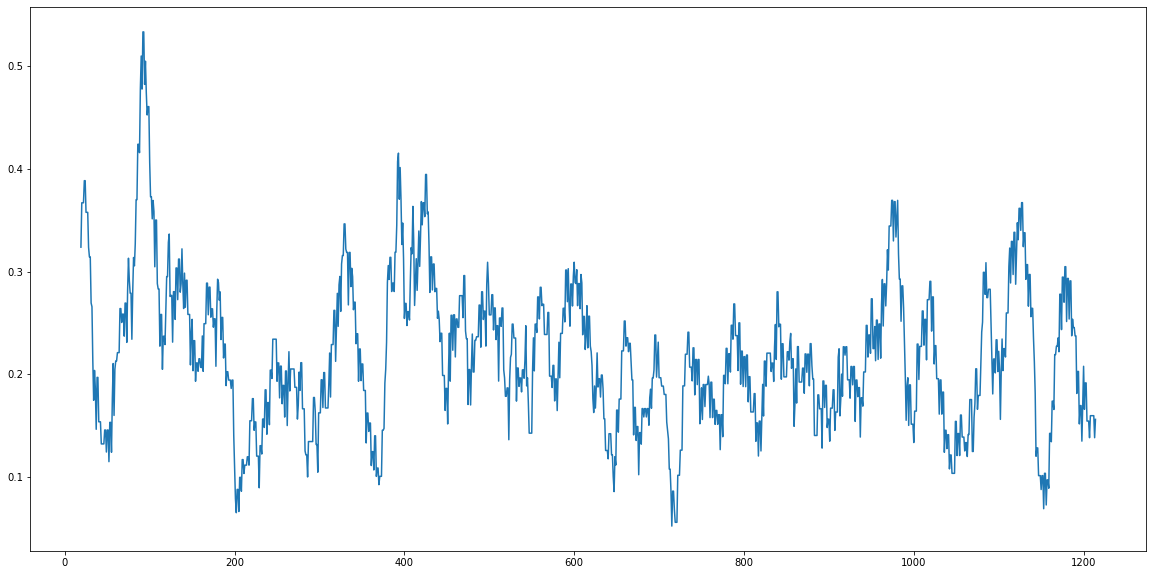

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
rolMean = ent_df.rolling(20).mean()
rolMean.plot()

<AxesSubplot:>

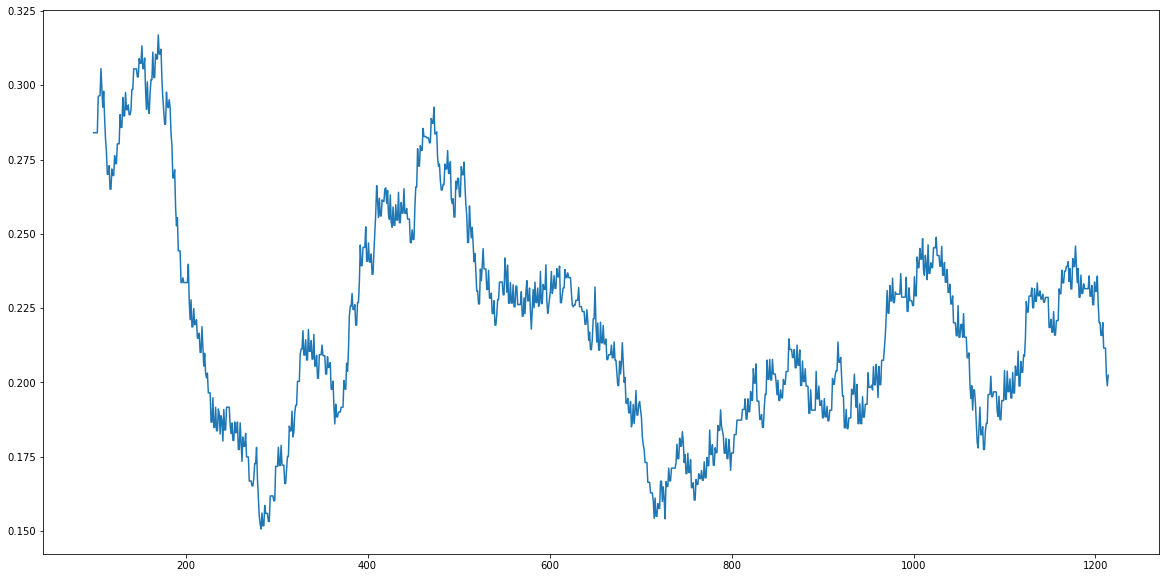

In [225]:
plt.figure(figsize=(20,10))
rolMean = ent_df.rolling(100).mean()
rolMean.plot()

In [90]:
pleft

,910,911,912,913,914,915,916,917,918,919,...,940,941,942,943,944,945,946,947,948,949
gene_id,,,,,,,,,,,,,,,,,,,,,
Z5741_00150,c,t,t,c,g,t,t,g,t,a,...,a,c,g,g,t,c,c,t,t,c
Z5761_00356,c,t,t,c,g,c,t,g,t,a,...,a,c,g,g,t,c,c,t,t,c
Z5761_04232,c,a,t,c,g,c,t,t,t,a,...,a,t,g,g,c,c,c,t,t,c
Z5781_04834,c,t,t,c,g,c,t,g,t,a,...,a,c,g,g,t,c,c,t,t,c
Z5801_01688,c,t,t,c,g,t,t,g,t,a,...,a,c,g,g,t,c,c,t,t,c
Z5821_01594,c,t,t,c,g,c,t,t,t,a,...,a,c,g,g,c,c,c,t,t,c
Z5821_02825,c,a,t,c,g,c,t,t,t,a,...,a,t,g,g,c,c,c,t,t,c
Z5841_00442,c,c,t,c,g,c,t,t,t,a,...,a,t,g,g,a,c,c,g,t,c
Z5871_03227,c,t,t,c,g,c,t,g,t,a,...,a,c,g,g,t,c,c,t,t,c


In [84]:
def get_IUPAC(s):
    iupac_dict = {('a',): 'A', ('c', ): 'C', ('g',): 'G', ('t', ): 'T', 
                  ('a', 't'):'W', ('c', 'g'): 'S', ('a', 'g'):'R', ('c', 't'):'Y',
                 ('g', 't'): 'K', ('a', 'c'):'M', ('c', 'g', 't'):'B',  ('a', 'g', 't'):'D', 
                 ('a', 'c', 't'): 'H', ('a', 'c', 'g'): 'V', ('a', 'c', 'g', 't'):'N'}
    letters = tuple(sorted(s.unique()))
    #return letters
    if letters in iupac_dict.keys():
        return iupac_dict[letters]
    return np.nan

In [75]:
iupac_dict = {}

In [79]:
get_IUPAC(pleft[931])

'C'

<AxesSubplot:>

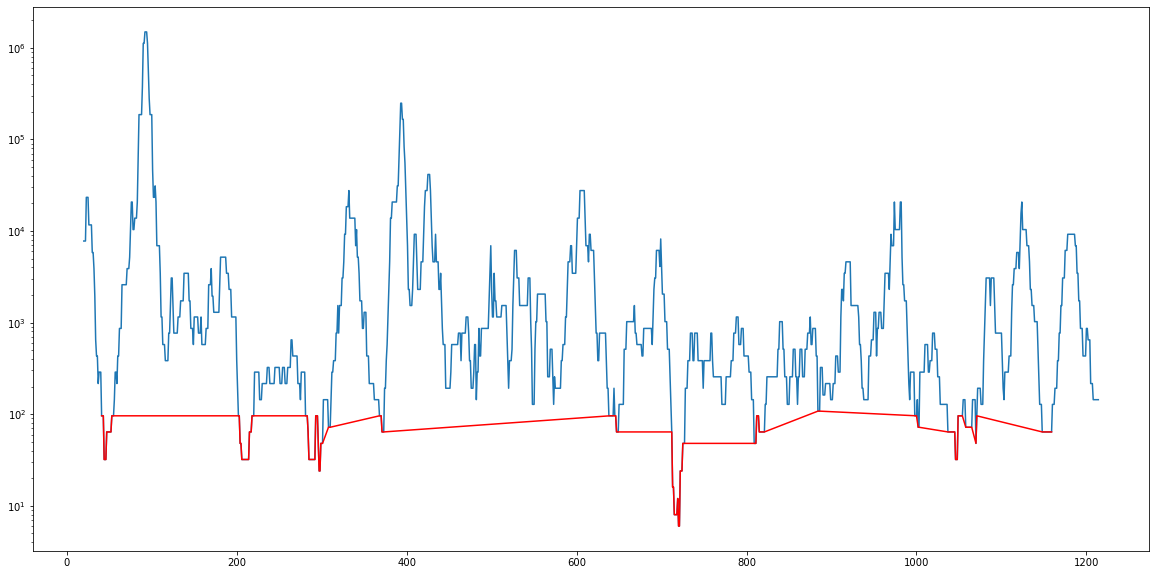

In [188]:
plt.figure(figsize=(20, 10))
combs = df.apply(lambda s: s.nunique()).rolling(21).apply(lambda x: x.product())
combs.plot()
plt.yscale('log')
combs[combs<128].plot(color='red')

In [197]:
df.iloc[:, 701:722].apply(lambda s: s.nunique()).rolling(21).apply(lambda x: x.product())

701    NaN
702    NaN
703    NaN
704    NaN
705    NaN
706    NaN
707    NaN
708    NaN
709    NaN
710    NaN
711    NaN
712    NaN
713    NaN
714    NaN
715    NaN
716    NaN
717    NaN
718    NaN
719    NaN
720    NaN
721    6.0
dtype: float64

In [194]:
df.iloc[:, 277:298].apply(get_IUPAC)

277    T
278    R
279    T
280    G
281    G
282    G
283    A
284    Y
285    A
286    T
287    Y
288    A
289    A
290    A
291    G
292    C
293    B
294    A
295    A
296    A
297    G
dtype: object

In [222]:
df.loc[['Z5741_00150', 'Z5761_00356',  'Z5781_04834',
       'Z5801_01688', 'Z5821_01594',  'Z5841_00442',
       'Z5871_03227', 'Z5894_00540',  'Z5931_00130',
       'Z5931_04132', 'Z5951_01069', 'Z5971_01645', 'Z6011_00542',
        'Z6021_03660', 'Z6023_00612',
       'Z6024_01161',  'Z6025_02578', 'Z6026_01302',
       'Z6027_01862']].agg("".join, axis=1).nunique()

13

In [214]:
"".join(df.iloc[:, 701:722].apply(get_IUPAC).values)

'GTTCTGGATGGAAGAYCCDAC'

In [212]:
df.agg(''.join, axis=1).nunique()

17

In [206]:
df.shape

(26, 1215)

In [156]:
s = "".join(df.apply(get_IUPAC).values)

In [157]:
s[200:]

'GCARTTYTTYTAYAARGGHGCBTAYTGGCGDCGYGGBCCSGTBACBATGTCRGCVATYTCHGCVRTKGATATGGCRYTRTGGGAYATYAAAGCBAAAGCNGCVAAYATGCCRYTNTAYCWRYTDYTBRGYGGHGCNTCYCGBGARGGVGTBATGGTYTAYTGYCAYACYACYGGBCRBWSNDTBGAYGAVGYNYTKGAWGAYTAYGCVMRDCAYMARSARMWBGGHTTYAARGCNATYCGBGTSCAGTGYGGHRTNCCKGGNATGMAAACBACYTAYGGHMTGKCBAARGGHAARGGNYWGGCBTAYGARCCNGCMACYAARGGNVWNTGGCCRGAMGARCARYTNTGGTCNWCNGARAARTAYCTCGAYTTYAYVCCRAARYTVTTYGMNGCVGTVCGYRRYMRDTTYGGYTTYRAYGARCATYTBYTKCAYGACATGCAYCAYCGYYTNACSCCNATYGARGCKGCVCGHTTYGGBARRAGYATYGARSMNTWYCGYMTGTTCTGGATGGAAGAYCCDACNCCYGCNGARAAYCAGGMVTGYTTYCGYYTSATYCGYCARCAYACSGTSACRCCNATYGCVGTNGGDGAAGTVTTYAAYAGYATYTGGGAYTGYAARCARYTNATYGAAGARCARYTNATYGAYTATATYCGYRCSACSMTNACCCAYGCDGGBGGHATYACCGGBATGCGNCGBATYGCBGAYTTYGCNKCDYTNTAYCAGGTRCGYACHGGYTCDCAYGGHCCDTCNGATYTVTCRCCNRTBTGYMWBGCBGCVGCKYTGCAYTTTGAYYTVTGGGTVCCNAAYTTYGGYGTNCARGARTAYATGGGYTAYTCMGARCARATGCTBGARGTBTTCCCRCAYARCTGGMSYTTYGABRMNGGYTAYATGCAYCCRGGHGAHRARCCVGGBMTBGGBATYKMNTTYGAYGARAARCTSGCRGCKAAATAYCCSTAYGANCCDGCNTRTYTNCCNGTBGCNCGHCTBGAAGAYGGYAC

In [134]:
df.apply(lambda x: x.value_counts()).max()/df.apply(lambda x: x.value_counts()).sum()

0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1210    1.000000
1211    1.000000
1212    1.000000
1213    1.000000
1214    0.884615
Length: 1215, dtype: float64

In [137]:
df.apply(lambda x: x.value_counts()).idxmax()

0       a
1       t
2       g
3       a
4       a
       ..
1210    g
1211    g
1212    t
1213    a
1214    a
Length: 1215, dtype: object

In [153]:
def get_likely_base(s):
    counts = s.value_counts()
    pconserved = counts.max()/counts.sum()
    if pconserved > 0.8:
        return counts.idxmax().upper()
    else:
        return "N"

In [149]:
get_likely_base(df[1200])

'N'

In [150]:
get_likely_base(df[200])

'G'

In [158]:
s = "".join(df.apply(get_likely_base).values)

In [159]:
s[200:]

'GCANTTNTTNTATAAAGGNGCTTACTGGCGNCGNGGNCCNGTNACNATGTCGGCCATTTCNGCNNTTGATATGGCGNTNTGGGANATNAAAGCNAAAGCNGCNAANATGCCGNTNTANCANNTNCTNGGNGGCGCNTCTCGNGAAGGNGTGATGGTNTATTGCCANACCACCGGNCNNANNATTGATGANGNNCTNGANGANTATGCNNNNCANCANNANNTGGGNTTNAANGCNATNCGNGTGCAGTGCGGNNTNCCNGGNATGNAAACNACNTANGGNNTGNCNAANGGNAAAGGNCTGGCNTATGAACCNGCAACCAAAGGNCAGTGGCCNGAAGAGCAGNTGTGGTCNNCNGANAANTANCTCGATTTNANGCCGAANNTNTTTGANGCNGTNCGNAANAAGTTNGGTTTTNANGAACATNTGNTGCATGACATGCACCATCGCNTNACNCCNATNGAAGCGGCGCGCTTTGGNAANAGCATTGANGATTANCGCNTGTTCTGGATGGAAGANCCGACNCCTGCNGANAACCAGGANTGNTTCCGTCTNATTCGCCANCATACCGTNACNCCNATNGCGGTNGGNGAAGTNTTNAANAGNATCTGGGACTGCAANCANNTNATNGAAGAGCANCTNATNGANTATATCCGCACNACGNTNACCCATGCNGGCGGNATTACCGGNATGCGNCGGATTGCNGATTTTGCNTCGCTNTATCAGGTNCGTACNGGNTCNCANGGNCCTTCNGATTTNTCNCCNGTNTGCNNNGCNGCNGCGCTGCANTTTGANCTNTGGGTNCCNAANTTNGGNGTNCAGGANTACATGGGNTATTCCGAACAAATGCTNGAAGTNTTCCCGCACANCTGGNNNTTCGATNANGGNTATATGCANCCNGGNGANNAACCNGGNCTNGGNATNNNNTTNGATGANAANCTGGCGGCGAAATATCCNTATGANCCNGCNTATCTNCCNGTNGCNCGNCTGGAAGATGGCAC